# Pregunta 4 : ARIMA’s / Prophet

In [428]:
import numpy as np
import pandas as pd
from numpy import log
from pylab import rcParams
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pandas.tseries.offsets import DateOffset
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [429]:
df = pd.read_csv("Base_de_Datos.csv")
subdf = df[df['Publisher'].str.contains('Nintendo')]

In [430]:
subdf = subdf.drop(['Publisher', 'Action','Platform','Adventure','Puzzle','Shooter','Misc','Sports','Racing','Simulation','Fighting','Role-Playing','Strategy'],axis=1)

<AxesSubplot:xlabel='Year'>

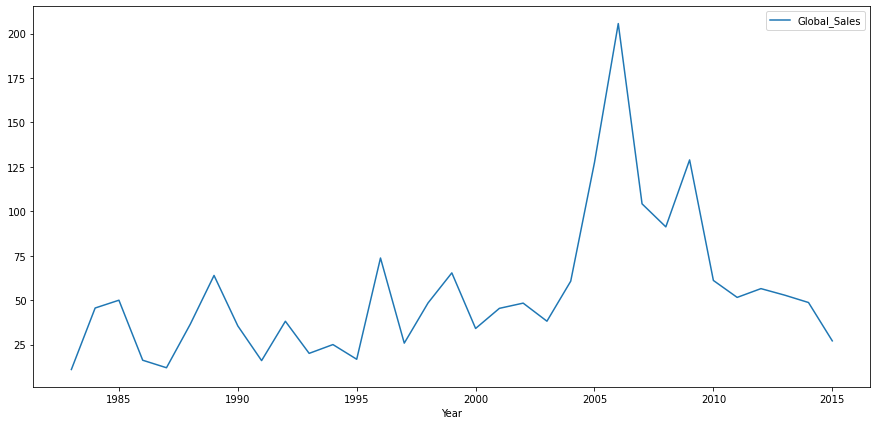

In [431]:
# Updating the header
subdf.set_index('Year',inplace=True)
rcParams['figure.figsize'] = 15, 7
subdf.plot()

In [432]:
test_result=adfuller(subdf['Global_Sales'])

In [433]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label + ' : ' + str(value) )
    if result[1] <= 0.05:
        print("Data is stationary")
    else:
        print("Data is no-stationary")

adfuller_test(subdf['Global_Sales'])

ADF Test Statistic : -2.8649379664276795
p-value : 0.04957979594889549
#Lags Used : 0
Number of Observations : 32
Data is stationary


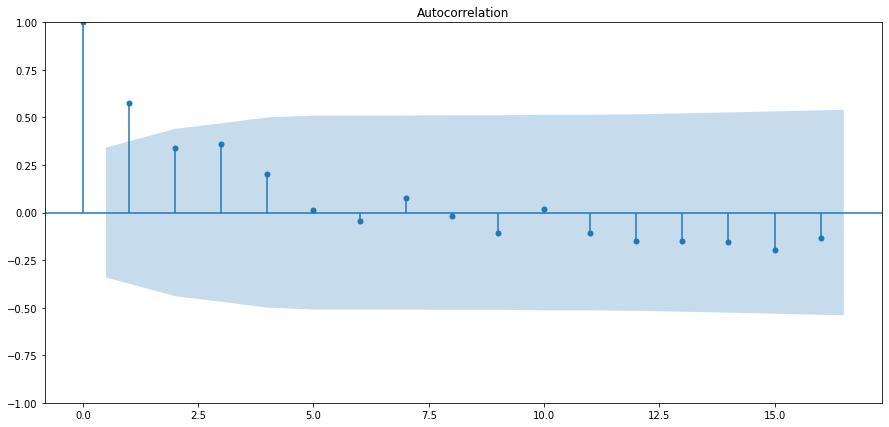

In [434]:
fig1 = plot_acf(subdf['Global_Sales']) 
#fig2 = plot_pacf(subdf['Global_Sales']) 

In [435]:
#model = ARIMA(subdf, order = (1, 0, 0))